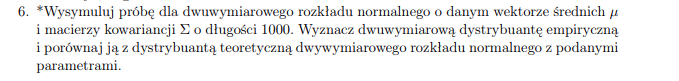

In [1]:
import numpy as np

In [116]:
mean = [1,2]
cov = [[2,1], [1,2]]
sigma = np.matrix(cov)
mi = np.matrix(mean).reshape(2,1)

W pierwszym kroku będziemy chcieli znaleźć macierz dolnotrójkątną $\textbf{A}$ taką, że $\textbf{A}\textbf{A}^T = \Sigma$. Weźmy 
$$ \textbf{A} = 
\begin{bmatrix}
a_{11} & 0 \\
a_{21} & a_{22}
\end{bmatrix}
$$
I przyrównajmy 
$$
\textbf{A} \textbf{A}^T = 
\begin{bmatrix}
a_{11} & 0 \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{21} \\
0 & a_{22}
\end{bmatrix} 
=
\begin{bmatrix}
a_{11}^2 & a_{21}a_{11} \\
a_{21}a_{11} & a_{22}^2 + a_{21}^2
\end{bmatrix} 
=
\begin{bmatrix}
s_{11} & s_{12} \\
s_{21} & s_{22}
\end{bmatrix} = \Sigma
$$
Stąd mamy 

\begin{equation*}
\begin{split}
a_{11} &= \sqrt{s_{11}} \\
a_{21} &= \frac{s_{21}}{a_{11}} \\
a_{22} &= \sqrt{s_{22} - a_{21}^2}

\end{split}
\end{equation*}


In [117]:
def cholesky_decomposition(sigma):
    s11 = sigma.item((0,0))
    s12 = sigma.item((0,1))
    s21 = sigma.item((1,0))
    s22 = sigma.item((1,1))
    a11 = np.sqrt(s11)
    a21 = s21/a11
    a22 = np.sqrt(s22 - a21**2)
    return np.matrix([[a11, 0], [a21, a22]])

W drugim kroku generujemy $n$ wektorów dwuwymiarowych $\textbf{Z}_i$, których składowe to niezależne zmienne losowe o standardowym rozkładzie normalnym.

In [126]:
n = 1000
Z = np.random.normal(loc = 0, scale = 1, size = 2 * n).reshape(2,n)
A = cholesky_decomposition(sigma)

Aby otrzymać szukane wektory $\textbf{X}_i$ o rozkładzie dwuwymiarowym normalnym wystarczy wykonać przekształcenie
$$
\textbf{X}_i = \mu + \textbf{A}\textbf{Z}_i
$$

In [127]:
X = np.array((mi + np.dot(A, Z)).reshape(n, 2))
print(X)

[[ 0.03506647  0.60053474]
 [-1.46914882  3.23110444]
 [ 0.86462158  0.27934777]
 ...
 [ 2.26269155  1.65085089]
 [ 3.02418015  3.31951443]
 [ 1.80190119  2.39384713]]


In [101]:
t1 = np.linspace(-4,4,100)
t2 = np.linspace(-4,4,100)
def ecdf(sample, ts1, ts2):
    sample.sort()
    result = []
    for t1 in ts1:
        for t2 in ts2:
            sum1 = 0
            for i in range(len(sample[0])):
                if sample[0][i]<= t1 and sample[1][i]<= t2:
                    sum1 += 1
            result.append(sum1/len(sample[0]))
    return result

In [102]:
empirical = ecdf(X, t1, t2)

In [103]:
print(empirical)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [128]:


# Generowanie próbek z dwuwymiarowego rozkładu normalnego
samples = X

samples_sorted = samples[np.argsort(samples[:, 0])]

# Obliczanie dwuwymiarowej dystrybuanty empirycznej
empirical_cdf = np.empty_like(samples_sorted)

for i in range(len(samples_sorted)):
    x = samples_sorted[i, 0]
    y = samples_sorted[i, 1]
    empirical_cdf[i] = [np.sum(samples_sorted[:, 0] <= x) / n,
                        np.sum(samples_sorted[:, 1] <= y) / n]


In [129]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm

ValueError: Argument Z must be 2-dimensional.

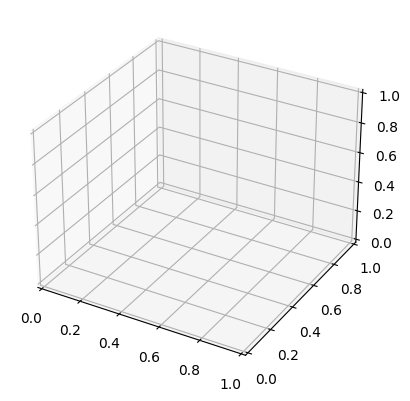

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Wyodrębnienie współrzędnych x, y i z
x = empirical_cdf[:, 0]
y = empirical_cdf[:, 1]
z = np.linspace(0, 1, len(empirical_cdf))

# Rysowanie powierzchni
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Ustawienie etykiet osi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Dystrybuanta empiryczna')

# Pokaż wykres
plt.show()

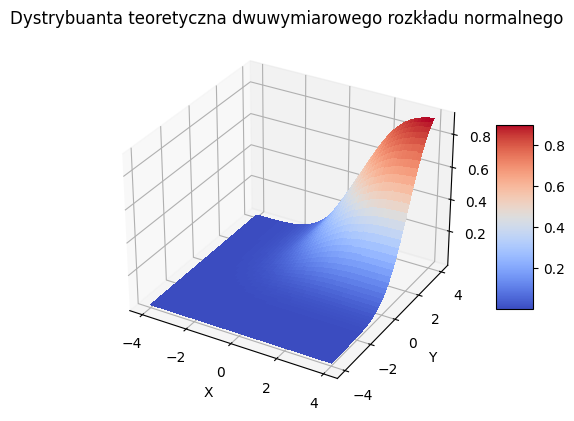

In [131]:



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Tworzenie dwuwymiarowego rozkładu normalnego
bivariate_normal = multivariate_normal(mean=mean, cov=cov)

# Utworzenie siatki punktów dla wykresu
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Obliczenie wartości dystrybuanty dla każdego punktu siatki
Z = bivariate_normal.cdf(pos)

# Wykres konturowy dystrybuanty
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dystrybuanta teoretyczna dwuwymiarowego rozkładu normalnego')
plt.show()